In [1]:
%matplotlib notebook
from helpers.helpers import read_results_alignment

from helpers.geometry_helpers import make_avg_fragment_if_not_exists
from helpers.helpers import read_results_alignment
from helpers.plot_functions import plot_fragment_colored

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import math

In [2]:
filenames = []
filenames.append(".\\results\\ArCI\\ArCI_R2CO_vdw.5\\ArCI_R2CO_vdw.5_aligned.csv")
filenames.append(".\\results\\ArCI\\ArCI_R2CO_vdw.5\\124_ArCI_R2CO_vdw.5_aligned.csv")
filenames.append(".\\results\\ArCI\\ArCI_R2CO_vdw.5\\426_ArCI_R2CO_vdw.5_aligned.csv")

dfs = []
for filename in filenames:
    dfs.append(read_results_alignment(filename))

In [3]:
avg_fragments = []

for df in dfs:
    central_group_df = df[df.in_central_group]

    fragment = central_group_df.groupby('atom_label').agg({'atom_symbol': 'first', 'atom_x': 'mean',
                                                                  'atom_y': 'mean', 'atom_z': 'mean'}).reset_index()
    fragment_stds = central_group_df.groupby('atom_label').agg({'atom_x': 'std',
                                                                  'atom_y': 'std', 'atom_z': 'std'}).reset_index()
    fragment_stds.columns = [col + '_std' for col in fragment_stds.columns]

    fragment_total = pd.merge(fragment, fragment_stds, left_on='atom_label', right_on='atom_label_std')
    fragment_total = fragment_total.drop(columns="atom_label_std")
    
    avg_fragments.append(fragment_total)
    
    display(fragment_total)

,atom_label,atom_symbol,atom_x,atom_y,atom_z,atom_x_std,atom_y_std,atom_z_std
0,C2,C,2.096272,-2.312698e-16,3.640728e-17,0.017817,1.000010e-14,2.749635e-15
1,C3,C,2.779173,1.206066e+00,1.093754e-16,0.040180,2.964598e-02,5.331076e-15
2,C4,C,4.164719,1.210416e+00,6.945239e-03,0.044321,7.543529e-02,6.503659e-02
3,C5,C,4.867420,1.547255e-02,1.394111e-02,0.030166,9.812138e-02,1.233982e-01
4,C6,C,4.175419,-1.187225e+00,1.309034e-02,0.047160,7.663087e-02,1.093857e-01
5,C7,C,2.788936,-1.200879e+00,6.413846e-03,0.042995,2.964843e-02,5.158319e-02
6,I1,I,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


,atom_label,atom_symbol,atom_x,atom_y,atom_z,atom_x_std,atom_y_std,atom_z_std
0,C2,C,2.096272,-2.309098e-16,4.326446e-17,0.017817,1.009168e-14,2.391692e-15
1,C3,C,2.779173,1.204285e+00,-7.403764e-03,0.040180,2.993952e-02,6.497761e-02
2,C4,C,4.164719,1.212193e+00,8.568827e-17,0.044321,7.524526e-02,6.654656e-15
3,C5,C,4.867420,2.180760e-02,1.429134e-02,0.030166,9.822450e-02,1.223141e-01
4,C6,C,4.175419,-1.180265e+00,2.070595e-02,0.047160,7.712867e-02,1.676717e-01
5,C7,C,2.788936,-1.196980e+00,1.381503e-02,0.042995,3.028014e-02,1.087343e-01
6,I1,I,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


,atom_label,atom_symbol,atom_x,atom_y,atom_z,atom_x_std,atom_y_std,atom_z_std
0,C2,C,2.398963,3.865173e-16,-2.888774e-16,0.022037,1.440534e-14,1.696383e-14
1,C3,C,1.200307,-6.967756e-01,-2.021778e-04,0.019292,1.879254e-02,2.126749e-02
2,C4,C,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
3,C5,C,-0.004441,1.388228e+00,3.485117e-04,0.031305,1.826263e-02,2.334781e-02
4,C6,C,1.201021,2.077478e+00,-9.363372e-15,0.032459,2.112509e-02,2.357367e-12
5,C7,C,2.406481,1.387625e+00,-3.516619e-05,0.033497,1.761997e-02,2.110961e-02
6,I1,I,4.206444,-1.055672e+00,8.650949e-03,0.040095,6.492061e-02,8.610414e-02


In [4]:
for i, avg_fragment in enumerate(avg_fragments):
    z = 2.58
    squared_datapoints = math.sqrt(len(dfs[i]))
    ci_z = z / squared_datapoints
    
    avg_fragment['atom_x_ci'] = avg_fragment['atom_x_std'] * ci_z / 2
    avg_fragment['atom_y_ci'] = avg_fragment['atom_y_std'] * ci_z / 2
    avg_fragment['atom_z_ci'] = avg_fragment['atom_z_std'] * ci_z / 2
    
    print(sum(avg_fragment.drop(columns=['atom_symbol', 'atom_x', 'atom_y', 'atom_z', 'atom_x_std', 'atom_y_std', 'atom_z_std']).mean()))
          
    print(avg_fragment.drop(columns=['atom_symbol', 'atom_x_std', 'atom_y_std', 'atom_z_std']).round(4).to_latex())
    print(avg_fragment.drop(columns=['atom_symbol', 'atom_x_std', 'atom_y_std', 'atom_z_std']).mean().round(4).to_latex())

display(avg_fragments[0])

0.0008901127503368372
\begin{tabular}{llrrrrrr}
\toprule
{} & atom\_label &  atom\_x &  atom\_y &  atom\_z &  atom\_x\_ci &  atom\_y\_ci &  atom\_z\_ci \\
\midrule
0 &         C2 &  2.0963 & -0.0000 &  0.0000 &     0.0001 &     0.0000 &     0.0000 \\
1 &         C3 &  2.7792 &  1.2061 &  0.0000 &     0.0003 &     0.0002 &     0.0000 \\
2 &         C4 &  4.1647 &  1.2104 &  0.0069 &     0.0003 &     0.0005 &     0.0005 \\
3 &         C5 &  4.8674 &  0.0155 &  0.0139 &     0.0002 &     0.0007 &     0.0009 \\
4 &         C6 &  4.1754 & -1.1872 &  0.0131 &     0.0003 &     0.0005 &     0.0008 \\
5 &         C7 &  2.7889 & -1.2009 &  0.0064 &     0.0003 &     0.0002 &     0.0004 \\
6 &         I1 &  0.0000 &  0.0000 &  0.0000 &     0.0000 &     0.0000 &     0.0000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
{} &       0 \\
\midrule
atom\_x    &  2.9817 \\
atom\_y    &  0.0063 \\
atom\_z    &  0.0058 \\
atom\_x\_ci &  0.0002 \\
atom\_y\_ci &  0.0003 \\
atom\_z\_ci &  0.0004 \\

,atom_label,atom_symbol,atom_x,atom_y,atom_z,atom_x_std,atom_y_std,atom_z_std,atom_x_ci,atom_y_ci,atom_z_ci
0,C2,C,2.096272,-2.312698e-16,3.640728e-17,0.017817,1.000010e-14,2.749635e-15,0.000126,7.068273e-17,1.943497e-17
1,C3,C,2.779173,1.206066e+00,1.093754e-16,0.040180,2.964598e-02,5.331076e-15,0.000284,2.095437e-04,3.768112e-17
2,C4,C,4.164719,1.210416e+00,6.945239e-03,0.044321,7.543529e-02,6.503659e-02,0.000313,5.331918e-04,4.596917e-04
3,C5,C,4.867420,1.547255e-02,1.394111e-02,0.030166,9.812138e-02,1.233982e-01,0.000213,6.935417e-04,8.722034e-04
4,C6,C,4.175419,-1.187225e+00,1.309034e-02,0.047160,7.663087e-02,1.093857e-01,0.000333,5.416424e-04,7.731603e-04
5,C7,C,2.788936,-1.200879e+00,6.413846e-03,0.042995,2.964843e-02,5.158319e-02,0.000304,2.095610e-04,3.646004e-04
6,I1,I,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


<IPython.core.display.Javascript object>


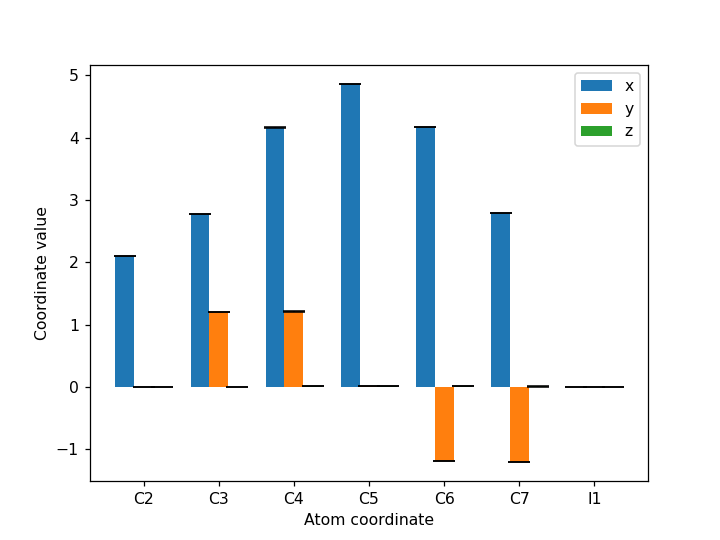

<IPython.core.display.Javascript object>


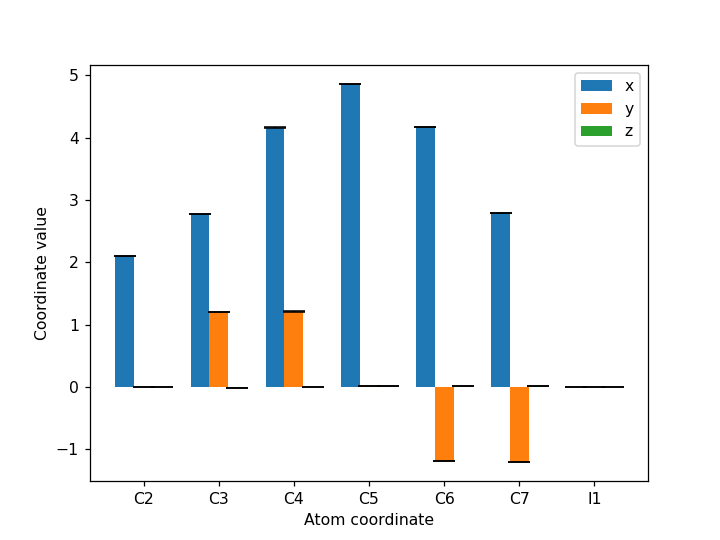

<IPython.core.display.Javascript object>


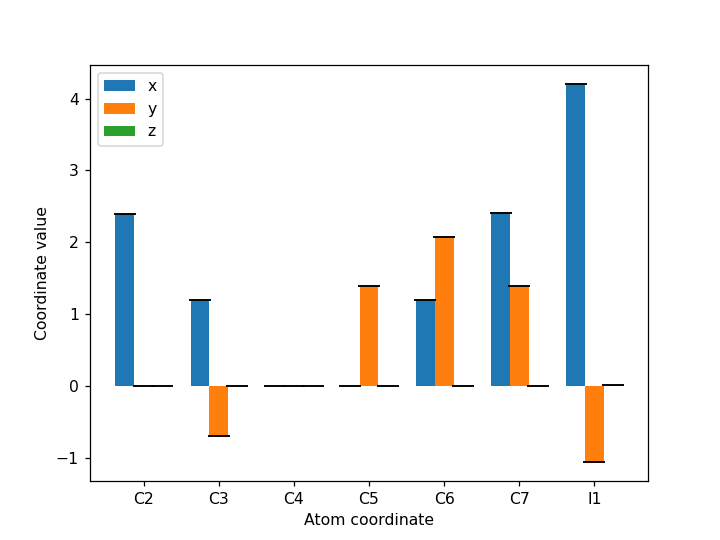

In [10]:
for avg_fragment in avg_fragments:
    # width of the bars
    bar_width = 0.25

    r1 = np.arange(len(fragment_total))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    plt.figure()
    plt.bar(r1, avg_fragment.atom_x, yerr=avg_fragment.atom_x_ci, width=bar_width,
            capsize=7, label='x', color='tab:blue')

    plt.bar(r2, avg_fragment.atom_y, yerr=avg_fragment.atom_y_ci, width=bar_width,
            capsize=7, label='y', color='tab:orange')

    plt.bar(r3, avg_fragment.atom_z, yerr=avg_fragment.atom_z_ci, width=bar_width,
            capsize=7, label='z', color='tab:green')

    plt.xticks([r + bar_width for r in range(len(avg_fragment))], [atom.atom_label for _, atom in avg_fragment.iterrows()])

    plt.xlabel('Atom coordinate')
    plt.ylabel('Coordinate value')

    plt.legend()
    plt.show()

In [6]:
for avg_fragment in avg_fragments:
    plt.figure(figsize=(8, 4))
    plt.title("Confidence Intervals per sample mean")
    
    plt.bar(r1, avg_fragment.atom_x_std * ci_z / 2, width=bar_width,
            capsize=7, label='x', color='tab:blue')

    plt.bar(r2, avg_fragment.atom_y_std * ci_z / 2, width=bar_width,
            capsize=7, label='y', color='tab:orange')

    plt.bar(r3, avg_fragment.atom_z_std * ci_z / 2, width=bar_width,
            capsize=7, label='z', color='tab:green')


    bar = plt.bar(r1[-1] + 1, sum(avg_fragment.atom_x_ci)/len(avg_fragment), width=bar_width,
            capsize=7, color='tab:blue')
    
    bar = plt.bar(r2[-1] + 1, sum(avg_fragment.atom_y_ci)/len(avg_fragment), width=bar_width,
            capsize=7, color='tab:orange')

    bar = plt.bar(r3[-1] + 1, sum(avg_fragment.atom_z_ci)/len(avg_fragment), width=bar_width,
            capsize=7, color='tab:green')

    xtick_labels = [atom.atom_label for _, atom in avg_fragment.iterrows()]
    xtick_labels.append('Average')
    plt.xticks([r + bar_width for r in range(len(avg_fragment) + 1)], xtick_labels)

    plt.xlabel('Atom label')
    plt.ylabel('Coordinate value')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


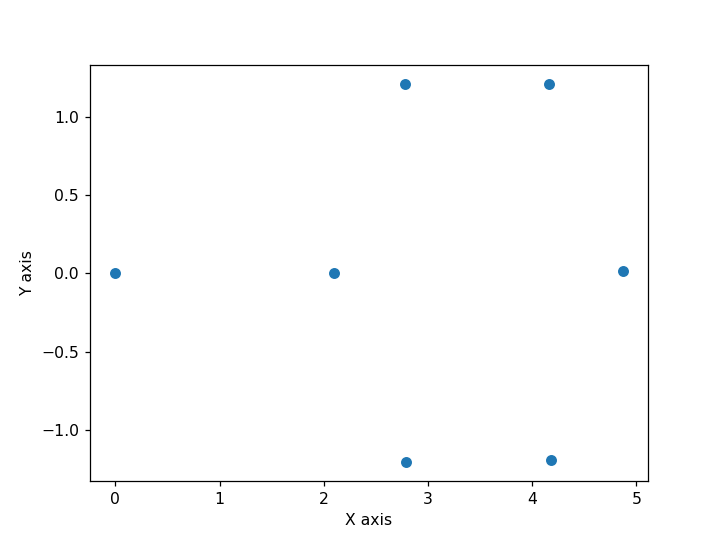

<IPython.core.display.Javascript object>


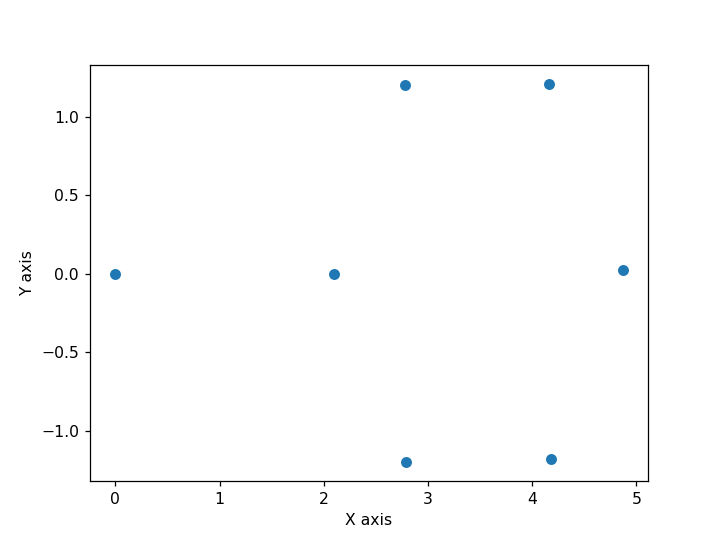

<IPython.core.display.Javascript object>


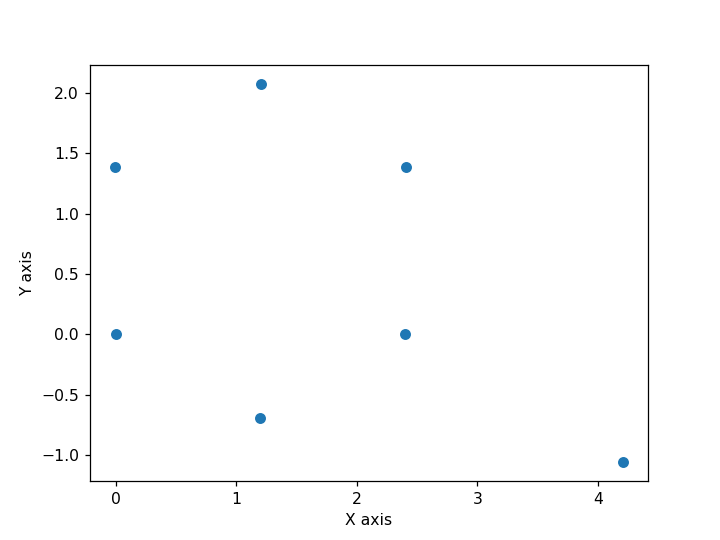

In [9]:
for avg_fragment in avg_fragments:

    fig = plt.figure()
    
    # plot the (average of the) central group
    plt.scatter(avg_fragment.atom_x, avg_fragment.atom_y)

    plt.xlabel('X axis')
    plt.ylabel('Y axis')

    plt.show()